# **Importing the Libraries**

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [ ]:
dt=pd.read_csv('bank-full.csv')

In [ ]:
dt.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


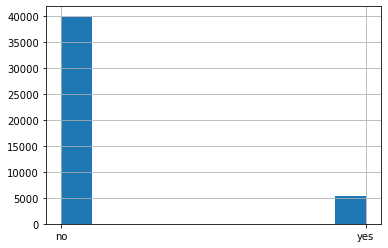

In [ ]:
dt['Target'].hist()

# data is imbalanced as per above figure

In [ ]:
dt.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [ ]:
dt.duplicated().sum()

0

# Thus we check for the distribution of variables 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


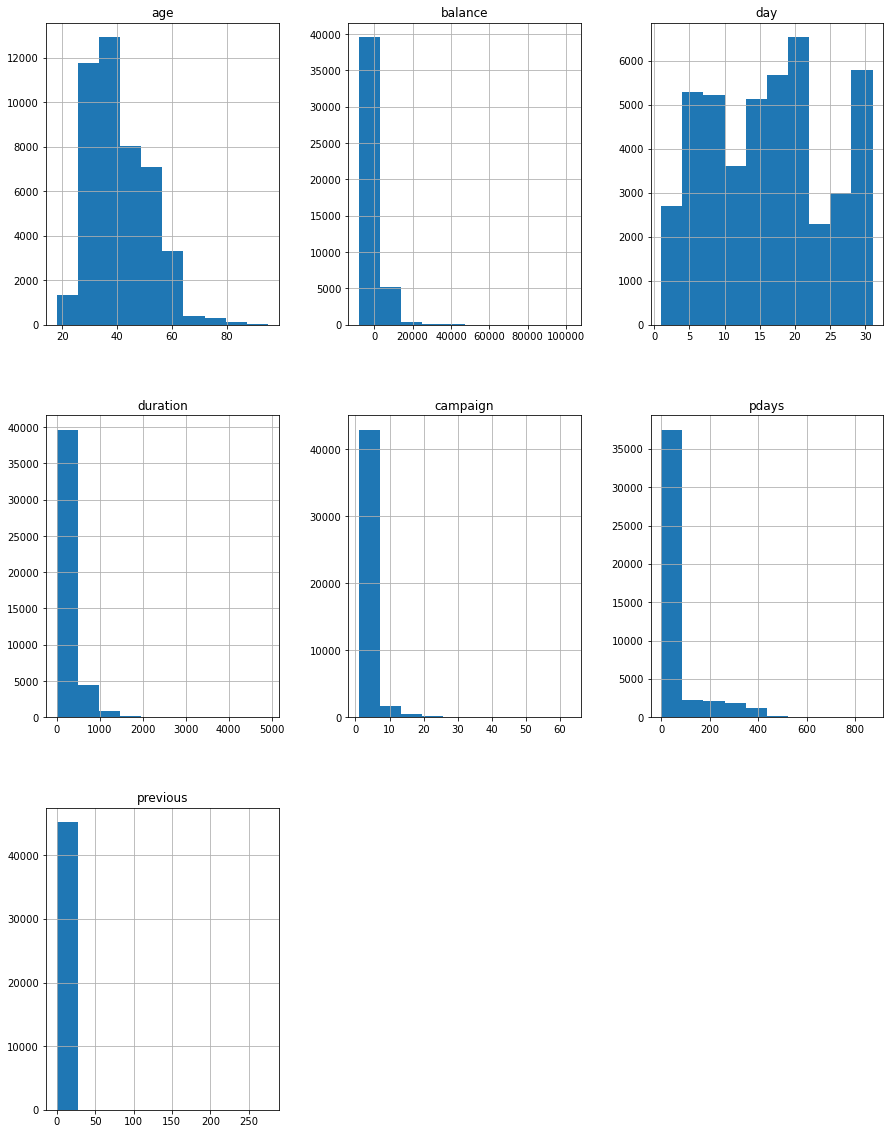

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dt.hist(ax = ax)
plt.show()

# Correlation matrix of the variables

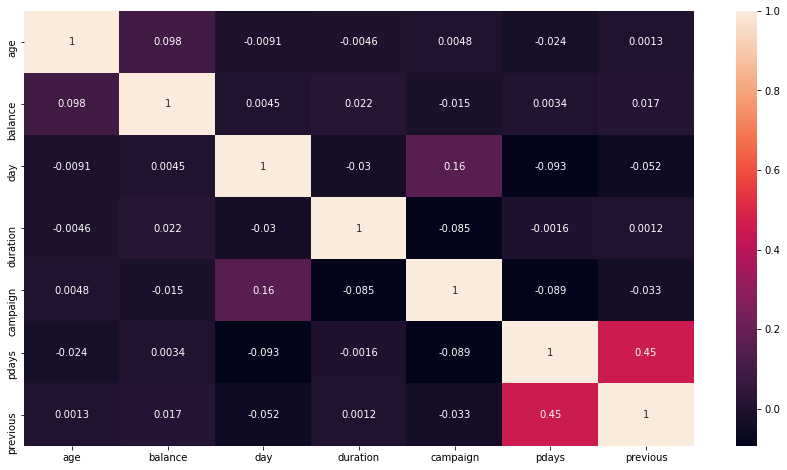

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(dt.corr(),annot=True)
plt.show()

# Mapping Yes to 1 and No to 0

In [ ]:
dt['default'] = dt['default'].map({'yes': 1, 'no': 0})
dt['housing'] = dt['housing'].map({'yes': 1, 'no': 0})
dt['loan'] = dt['loan'].map({'yes': 1, 'no': 0})
dt['Target'] = dt['Target'].map({'yes': 1, 'no': 0})

# Removing the irrelevant variables

In [ ]:
dt.drop(['day','month','marital'],1,inplace=True)

In [ ]:
dt.shape

(45211, 14)

# Creating dummy variables and simultaneously removing one variable to avoid dummy variable trap

In [ ]:
job = pd.get_dummies(dt['job'],prefix='job',drop_first=True)
dt = pd.concat([dt,job],axis=1)

edu = pd.get_dummies(dt['education'],prefix='education',drop_first=True)
dt = pd.concat([dt,edu],axis=1)

cont = pd.get_dummies(dt['contact'],prefix='contact',drop_first=True)
dt = pd.concat([dt,cont],axis=1)

pout = pd.get_dummies(dt['poutcome'],prefix='poutcome',drop_first=True)
dt = pd.concat([dt,pout],axis=1)

In [ ]:
dt.drop(['job','education','contact','poutcome'], 1,inplace=True)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   duration             45211 non-null  int64
 6   campaign             45211 non-null  int64
 7   pdays                45211 non-null  int64
 8   previous             45211 non-null  int64
 9   Target               45211 non-null  int64
 10  job_blue-collar      45211 non-null  uint8
 11  job_entrepreneur     45211 non-null  uint8
 12  job_housemaid        45211 non-null  uint8
 13  job_management       45211 non-null  uint8
 14  job_retired          45211 non-null  uint8
 15  job_self-employed    45211 non-null  uint8
 16  job_services         4

In [ ]:
dt.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,Target,...,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,261,1,-1,0,0,...,0,0,0,1,0,0,1,0,0,1
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,1,0,0,0,1,0,0,1
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,1,0,0,0,1,0,0,1
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,1,0,1,0,0,1
4,33,0,1,0,0,198,1,-1,0,0,...,0,1,0,0,1,0,1,0,0,1


# Detection of Outliers using BoxPlot

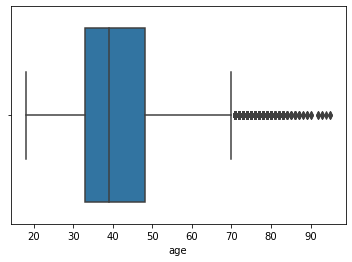

In [ ]:
sns.boxplot(x=dt['age'])

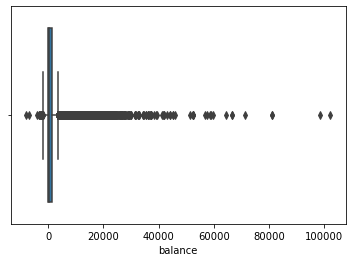

In [ ]:
sns.boxplot(x=dt['balance'])

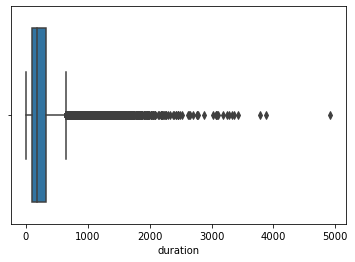

In [ ]:
sns.boxplot(x=dt['duration'])

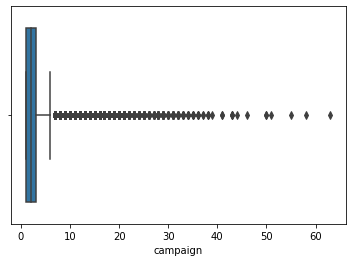

In [ ]:
sns.boxplot(x=dt['campaign'])

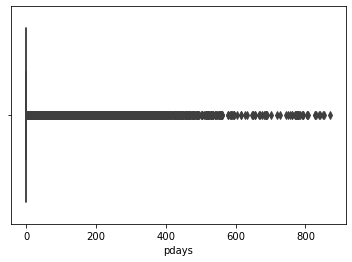

In [ ]:
sns.boxplot(x=dt['pdays'])

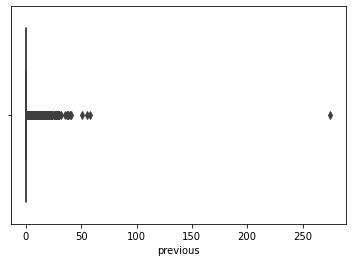

In [ ]:
sns.boxplot(x=dt['previous'])

# Z-score
*Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution. While calculating the Z-score we re-scale the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.*

In [ ]:
from scipy import stats
z = np.abs(stats.zscore(dt[['age','balance','duration','campaign','pdays','previous']]))
print(z)

[[1.60696496 0.25641925 0.0110161  0.56935064 0.41145311 0.25194037]
 [0.28852927 0.43789469 0.41612696 0.56935064 0.41145311 0.25194037]
 [0.74738448 0.44676247 0.70736086 0.56935064 0.41145311 0.25194037]
 ...
 [2.92540065 1.42959305 3.37379688 0.72181052 1.43618859 1.05047333]
 [1.51279098 0.22802402 0.97014641 0.39902023 0.41145311 0.25194037]
 [0.37068857 0.52836436 0.39932797 0.24656035 1.4761376  4.52357654]]


In [ ]:
threshold = 3
print(np.where(z > 3))

(array([   34,    37,    43, ..., 45204, 45208, 45210]), array([1, 2, 2, ..., 5, 2, 5]))


*Rows and Columns before removing the outliers*

In [ ]:
dt.shape

(45211, 29)

In [ ]:
df = dt[(z < 3).all(axis=1)]

*Rows and columns after removing the outliers*

In [ ]:
df.shape

(40209, 29)

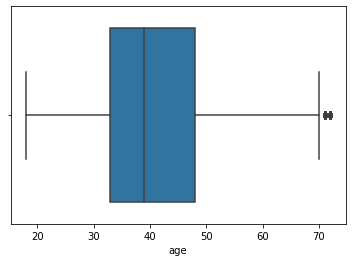

In [ ]:
sns.boxplot(df['age'])

In [ ]:
df.describe()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,Target,...,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
count,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,...,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000,40209.000000
mean,40.659728,0.018727,1083.466189,0.551195,0.164739,235.794723,2.464324,25.184312,0.352632,0.100823,...,0.029521,0.006416,0.515830,0.293541,0.040488,0.057997,0.305106,0.028874,0.029471,0.858539
std,10.086648,0.135561,1722.823814,0.497378,0.370950,190.408412,1.951391,71.762763,1.056890,0.301098,...,0.169263,0.079846,0.499756,0.455390,0.197104,0.233741,0.460458,0.167455,0.169125,0.348501
min,18.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,66.000000,0.000000,0.000000,104.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,0.000000,430.000000,1.000000,0.000000,178.000000,2.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,0.000000,1345.000000,1.000000,0.000000,306.000000,3.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,72.000000,1.000000,10483.000000,1.000000,1.000000,1030.000000,12.000000,340.000000,7.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,Target,...,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,261,1,-1,0,0,...,0,0,0,1,0,0,1,0,0,1
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,1,0,0,0,1,0,0,1
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,1,0,0,0,1,0,0,1
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,1,0,1,0,0,1
4,33,0,1,0,0,198,1,-1,0,0,...,0,1,0,0,1,0,1,0,0,1


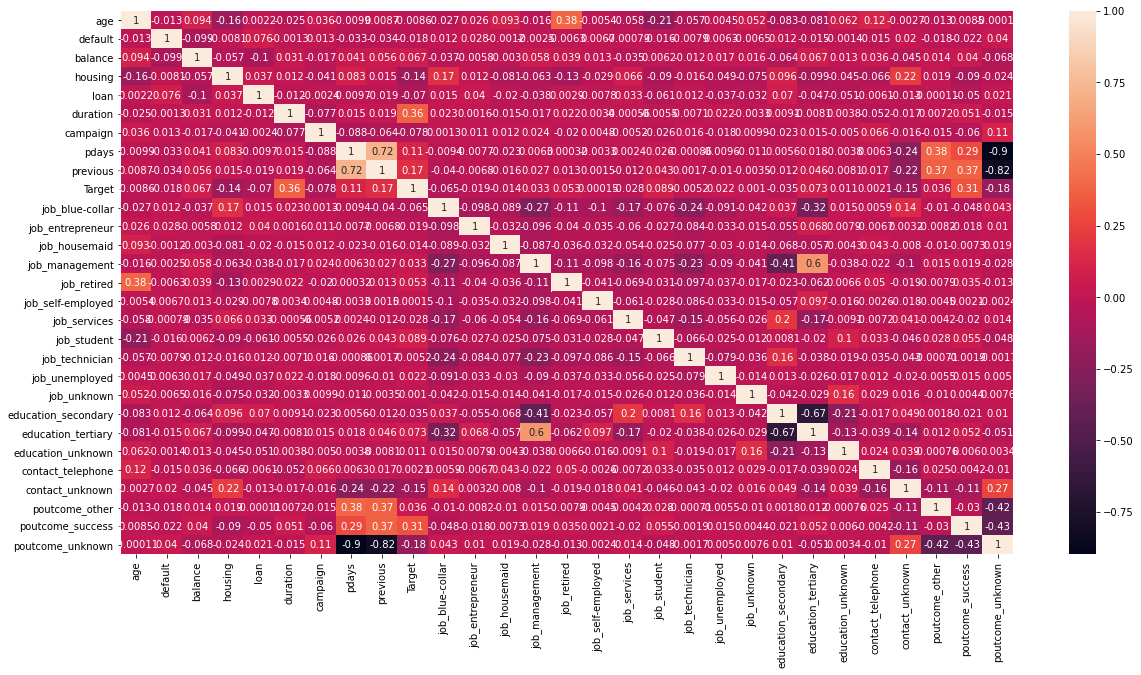

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
X = df.drop(['Target'],1)
y = df['Target']

# Removal of irrelevant variables

*Here we will use logit function to check which variables are relevant. This is done by checking the p-value of the variables. The variables which has p-value greater then 0.05 will be removed*

In [ ]:
import statsmodels.api as sm

res = sm.Logit(y,X).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.224485
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                40209
Model:                          Logit   Df Residuals:                    40181
Method:                           MLE   Df Model:                           27
Date:                Sun, 13 Sep 2020   Pseudo R-squ.:                  0.3133
Time:                        15:03:26   Log-Likelihood:                -9026.3
converged:                       True   LL-Null:                       -13144.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0230      0.002    -11.857      0.000      -0.027      -0.019
default                -0.0635      0.174     -0.365      0.715      -0.404       0.277
balance              4.689e-05   1.06e-05      4.441      0.000    2.62e-05    6.76e-05
housing                -0.9233      0.044    -21.117      0.000      -1.009      -0.838
loan                   -0.6947      0.066    -10.561      0.000      -0.824      -0.566
duration                0.0054   8.82e-05     60.807      0.000       0.005       0.006
campaign               -0.1713      0.014    -12.625      0.000      -0.198      -0.145
pdays                  -0.0060      0.000    -13.129      0.000      -0.007      -0.005
previous               -0.0221      0.023     -0.960      0.337      -0.067       0.023
job_blue-collar        -0.6765      0.075     -9.055      0.000      -0.823      -0.530
job_entrepreneur       -0.7811      0.137     -5.717      0.000      -1.049      -0.513
job_housemaid          -0.7125      0.143     -4.998      0.000      -0.992      -0.433
job_management         -0.4971      0.077     -6.475      0.000      -0.648      -0.347
job_retired             0.2490      0.108      2.315      0.021       0.038       0.460
job_self-employed      -0.7095      0.121     -5.865      0.000      -0.947      -0.472
job_services           -0.5346      0.089     -5.982      0.000      -0.710      -0.359
job_student             0.1635      0.109      1.496      0.135      -0.051       0.378
job_technician         -0.4993      0.071     -6.993      0.000      -0.639      -0.359
job_unemployed         -0.5097      0.117     -4.365      0.000      -0.739      -0.281
job_unknown            -0.7254      0.264     -2.744      0.006      -1.244      -0.207
education_secondary    -0.1423      0.063     -2.247      0.025      -0.267      -0.018
education_tertiary      0.1739      0.075      2.330      0.020       0.028       0.320
education_unknown       0.0398      0.112      0.356      0.722      -0.179       0.259
contact_telephone       0.0369      0.085      0.432      0.666      -0.131       0.204
contact_unknown        -1.2353      0.064    -19.320      0.000      -1.361      -1.110
poutcome_other         -0.0359      0.107     -0.335      0.738      -0.246       0.175
poutcome_success        1.9666      0.088     22.421      0.000       1.795       2.139
poutcome_unknown       -1.7021      0.095    -17.906      0.000      -1.888      -1.516
=======================================================================================
"""

In [ ]:
X.drop(['poutcome_other','default'],1,inplace=True)

In [ ]:
res = sm.Logit(y,X).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.224488
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                40209
Model:                          Logit   Df Residuals:                    40183
Method:                           MLE   Df Model:                           25
Date:                Sun, 13 Sep 2020   Pseudo R-squ.:                  0.3133
Time:                        15:03:27   Log-Likelihood:                -9026.5
converged:                       True   LL-Null:                       -13144.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0231      0.002    -11.970      0.000      -0.027      -0.019
balance              4.724e-05   1.05e-05      4.488      0.000    2.66e-05    6.79e-05
housing                -0.9231      0.044    -21.116      0.000      -1.009      -0.837
loan                   -0.6967      0.066    -10.620      0.000      -0.825      -0.568
duration                0.0054   8.82e-05     60.836      0.000       0.005       0.006
campaign               -0.1715      0.014    -12.650      0.000      -0.198      -0.145
pdays                  -0.0060      0.000    -13.155      0.000      -0.007      -0.005
previous               -0.0230      0.023     -1.003      0.316      -0.068       0.022
job_blue-collar        -0.6786      0.075     -9.101      0.000      -0.825      -0.532
job_entrepreneur       -0.7837      0.137     -5.740      0.000      -1.051      -0.516
job_housemaid          -0.7140      0.142     -5.011      0.000      -0.993      -0.435
job_management         -0.4988      0.077     -6.505      0.000      -0.649      -0.349
job_retired             0.2489      0.108      2.314      0.021       0.038       0.460
job_self-employed      -0.7113      0.121     -5.883      0.000      -0.948      -0.474
job_services           -0.5358      0.089     -6.001      0.000      -0.711      -0.361
job_student             0.1610      0.109      1.478      0.140      -0.053       0.375
job_technician         -0.5005      0.071     -7.017      0.000      -0.640      -0.361
job_unemployed         -0.5113      0.117     -4.382      0.000      -0.740      -0.283
job_unknown            -0.7252      0.264     -2.743      0.006      -1.243      -0.207
education_secondary    -0.1445      0.063     -2.293      0.022      -0.268      -0.021
education_tertiary      0.1722      0.074      2.315      0.021       0.026       0.318
education_unknown       0.0381      0.112      0.342      0.733      -0.181       0.257
contact_telephone       0.0370      0.085      0.433      0.665      -0.130       0.204
contact_unknown        -1.2356      0.064    -19.327      0.000      -1.361      -1.110
poutcome_success        1.9761      0.083     23.738      0.000       1.813       2.139
poutcome_unknown       -1.6966      0.093    -18.230      0.000      -1.879      -1.514
=======================================================================================
"""

In [ ]:
X.drop(['education_unknown','contact_telephone'],1,inplace=True)

In [ ]:
res = sm.Logit(y,X).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.224492
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                40209
Model:                          Logit   Df Residuals:                    40185
Method:                           MLE   Df Model:                           23
Date:                Sun, 13 Sep 2020   Pseudo R-squ.:                  0.3132
Time:                        15:03:27   Log-Likelihood:                -9026.6
converged:                       True   LL-Null:                       -13144.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0229      0.002    -12.068      0.000      -0.027      -0.019
balance               4.74e-05   1.05e-05      4.505      0.000    2.68e-05     6.8e-05
housing                -0.9236      0.044    -21.131      0.000      -1.009      -0.838
loan                   -0.6969      0.066    -10.623      0.000      -0.826      -0.568
duration                0.0054   8.81e-05     60.897      0.000       0.005       0.006
campaign               -0.1712      0.014    -12.646      0.000      -0.198      -0.145
pdays                  -0.0060      0.000    -13.228      0.000      -0.007      -0.005
previous               -0.0224      0.023     -0.982      0.326      -0.067       0.022
job_blue-collar        -0.6804      0.074     -9.147      0.000      -0.826      -0.535
job_entrepreneur       -0.7825      0.136     -5.734      0.000      -1.050      -0.515
job_housemaid          -0.7163      0.142     -5.040      0.000      -0.995      -0.438
job_management         -0.4975      0.077     -6.501      0.000      -0.648      -0.348
job_retired             0.2463      0.107      2.298      0.022       0.036       0.456
job_self-employed      -0.7101      0.121     -5.877      0.000      -0.947      -0.473
job_services           -0.5353      0.089     -5.996      0.000      -0.710      -0.360
job_student             0.1703      0.107      1.593      0.111      -0.039       0.380
job_technician         -0.4998      0.071     -7.019      0.000      -0.639      -0.360
job_unemployed         -0.5115      0.117     -4.384      0.000      -0.740      -0.283
job_unknown            -0.7130      0.263     -2.716      0.007      -1.228      -0.198
education_secondary    -0.1548      0.056     -2.742      0.006      -0.265      -0.044
education_tertiary      0.1605      0.068      2.368      0.018       0.028       0.293
contact_unknown        -1.2376      0.064    -19.439      0.000      -1.362      -1.113
poutcome_success        1.9770      0.083     23.798      0.000       1.814       2.140
poutcome_unknown       -1.6911      0.092    -18.452      0.000      -1.871      -1.511
=======================================================================================
"""

In [ ]:
X.drop(['previous','job_student'],1,inplace=True)

In [ ]:
res = sm.Logit(y,X).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.224530
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                40209
Model:                          Logit   Df Residuals:                    40187
Method:                           MLE   Df Model:                           21
Date:                Sun, 13 Sep 2020   Pseudo R-squ.:                  0.3131
Time:                        15:03:28   Log-Likelihood:                -9028.1
converged:                       True   LL-Null:                       -13144.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0235      0.002    -12.971      0.000      -0.027      -0.020
balance              4.793e-05   1.05e-05      4.562      0.000    2.73e-05    6.85e-05
housing                -0.9321      0.043    -21.459      0.000      -1.017      -0.847
loan                   -0.7035      0.066    -10.739      0.000      -0.832      -0.575
duration                0.0054    8.8e-05     60.950      0.000       0.005       0.006
campaign               -0.1715      0.013    -12.731      0.000      -0.198      -0.145
pdays                  -0.0059      0.000    -13.579      0.000      -0.007      -0.005
job_blue-collar        -0.7147      0.071    -10.007      0.000      -0.855      -0.575
job_entrepreneur       -0.8165      0.135     -6.060      0.000      -1.081      -0.552
job_housemaid          -0.7497      0.141     -5.333      0.000      -1.025      -0.474
job_management         -0.5347      0.073     -7.335      0.000      -0.678      -0.392
job_retired             0.2208      0.105      2.095      0.036       0.014       0.427
job_self-employed      -0.7476      0.119     -6.299      0.000      -0.980      -0.515
job_services           -0.5699      0.087     -6.574      0.000      -0.740      -0.400
job_technician         -0.5356      0.068     -7.912      0.000      -0.668      -0.403
job_unemployed         -0.5472      0.115     -4.778      0.000      -0.772      -0.323
job_unknown            -0.7511      0.262     -2.870      0.004      -1.264      -0.238
education_secondary    -0.1617      0.056     -2.908      0.004      -0.271      -0.053
education_tertiary      0.1567      0.067      2.345      0.019       0.026       0.288
contact_unknown        -1.2403      0.064    -19.486      0.000      -1.365      -1.116
poutcome_success        1.9773      0.082     24.070      0.000       1.816       2.138
poutcome_unknown       -1.6205      0.080    -20.356      0.000      -1.777      -1.464
=======================================================================================
"""

# *Synthetic Minority Oversampling Technique(SMOTE)*

*SMOTE first selects a minority class instance x¹ at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors x² at random and connecting x¹ and x² to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances x² and x¹.*

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [ ]:
#The numbers before SMOTE
num_before = dict(Counter(y))

#Performing SMOTE

#Define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

#Transforming the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#Tthe numbers after SMOTE
num_after =dict(Counter(y_smote))


In [ ]:
print(num_before, num_after)

{0: 36155, 1: 4054} {0: 36155, 1: 28924}


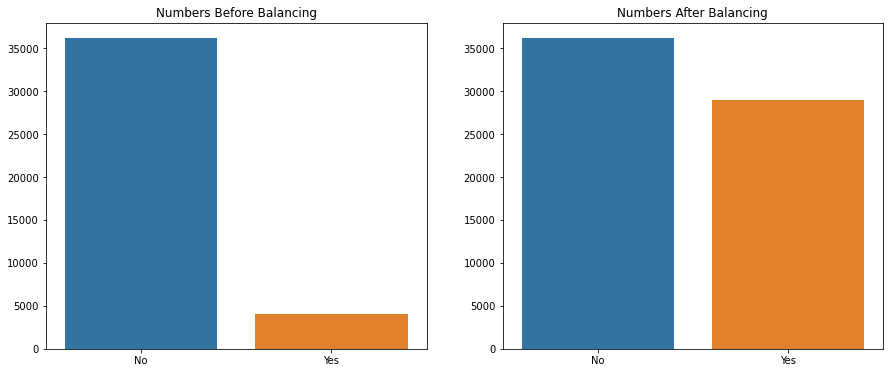

In [ ]:
labels = ["No","Yes"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

In [ ]:
X1 = pd.DataFrame(X_smote)
y1= pd.DataFrame(y_smote)

In [ ]:
new_data = pd.concat([X1, y1], axis=1)
new_data.columns = ['age', 'balance', 'housing', 'loan', 'duration', 'campaign', 'pdays','job_blue-collar','job_entrepreneur','job_housemaid',
                    'job_management','job_retired','job_self-employed','job_services','job_technician','job_unemployed','job_unknown','education_secondary',
                    'education_tertiary','contact_unknown','poutcome_success','poutcome_unknown','outcome']
new_data.head()

,age,balance,housing,loan,duration,campaign,pdays,job_blue-collar,job_entrepreneur,job_housemaid,...,job_services,job_technician,job_unemployed,job_unknown,education_secondary,education_tertiary,contact_unknown,poutcome_success,poutcome_unknown,outcome
0,59,20,0,0,298,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,45,-149,1,0,287,2,-1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,37,4303,1,0,168,1,-1,0,0,0,...,0,0,0,0,0,1,1,0,1,0
3,45,1273,1,1,197,3,-1,0,1,0,...,0,0,0,0,0,1,1,0,1,0
4,36,-155,1,0,94,1,-1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
X_new = new_data.drop(['outcome'],1)
y_new = new_data['outcome']

In [ ]:
X_new.head()

,age,balance,housing,loan,duration,campaign,pdays,job_blue-collar,job_entrepreneur,job_housemaid,...,job_self-employed,job_services,job_technician,job_unemployed,job_unknown,education_secondary,education_tertiary,contact_unknown,poutcome_success,poutcome_unknown
0,59,20,0,0,298,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,45,-149,1,0,287,2,-1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,37,4303,1,0,168,1,-1,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,45,1273,1,1,197,3,-1,0,1,0,...,0,0,0,0,0,0,1,1,0,1
4,36,-155,1,0,94,1,-1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_new,y_new,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = lr.predict(x_test)
print(y_pred)

[0 0 0 ... 0 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix : \n",cm)
print("Accuracy :",acc)
print("Precision :",pre)
print("Recall :",recall)
print("F1-score :",f1)

Confusion Matrix : 
 [[6516  569]
 [ 673 5258]]
Accuracy : 0.9045789797172711
Precision : 0.9023511240775699
Recall : 0.8865284100488956
F1-score : 0.8943697907807451
